# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [10]:
# Carregando pacotes necessários e a base de gorjetas

import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from patsy import dmatrices
import numpy as np

tips = sns.load_dataset("tips")
tips['net_bill'] = tips['total_bill'] - tips['tip']

In [11]:
# Criação da matriz de design utilizando Patsy

y, X = dmatrices('tip ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

In [12]:
# Ajuste do modelo inicial

mod_initial = sm.OLS(y, X).fit()
print(mod_initial.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           2.64e-20
Time:                        18:19:11   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

In [13]:
# Supondo que a partir da saída, determinadas variáveis (por exemplo, smoker e time) não sejam significativas.
# Variáveis removidas e ajustadas novamente

y, X = dmatrices('tip ~ sex + net_bill', data=tips, return_type='dataframe')
mod_refined = sm.OLS(y, X).fit()
print(mod_refined.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     60.04
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           6.94e-22
Time:                        18:19:13   Log-Likelihood:                -375.62
No. Observations:                 244   AIC:                             757.2
Df Residuals:                     241   BIC:                             767.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.3382      0.185      7.218

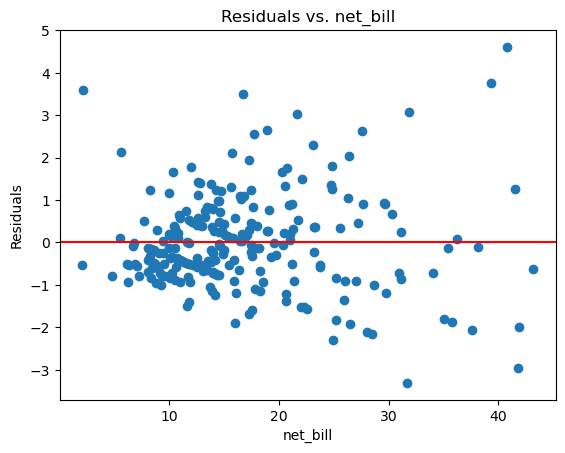

In [14]:
plt.scatter(tips['net_bill'], mod_refined.resid)
plt.axhline(0, color='red')
plt.title('Residuals vs. net_bill')
plt.xlabel('net_bill')
plt.ylabel('Residuals')
plt.show()

In [15]:
# Testando transformações em net_bill - logaritmo

tips['log_net_bill'] = np.log(tips['net_bill'] + 1)  # +1 para evitar log(0)
y, X_log = dmatrices('tip ~ sex + log_net_bill', data=tips, return_type='dataframe')
mod_log = sm.OLS(y, X_log).fit()
print(mod_log.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     52.77
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           9.80e-20
Time:                        18:19:18   Log-Likelihood:                -380.64
No. Observations:                 244   AIC:                             767.3
Df Residuals:                     241   BIC:                             777.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.8014      0.491     -3.668

In [16]:
# Testando transformações em net_bill - polimônio

tips['net_bill_sq'] = tips['net_bill']**2
y, X_poly = dmatrices('tip ~ sex + net_bill + net_bill_sq', data=tips, return_type='dataframe')
mod_poly = sm.OLS(y, X_poly).fit()
print(mod_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     40.20
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           4.39e-21
Time:                        18:19:48   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             758.6
Df Residuals:                     240   BIC:                             772.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.0800      0.365      2.956

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [17]:
# Importando os pacotes e a base de dados
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

In [18]:
# Modelo no log de tip

tips['log_tip'] = np.log(tips['tip'] + 1)  # +1 para evitar log(0)

y, X = dmatrices('log_tip ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')
mod = sm.OLS(y, X).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     28.53
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           2.19e-19
Time:                        18:20:59   Log-Likelihood:                -18.580
No. Observations:                 244   AIC:                             47.16
Df Residuals:                     239   BIC:                             64.65
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9232      0.056     16.

In [20]:
# Removendo variáveis não significantes e ajustar novamente (removendo a variável time para fins de ilustração)

y, X = dmatrices('log_tip ~ sex + smoker + net_bill', data=tips, return_type='dataframe')
mod = sm.OLS(y, X).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     38.11
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           3.54e-20
Time:                        18:22:05   Log-Likelihood:                -18.670
No. Observations:                 244   AIC:                             45.34
Df Residuals:                     240   BIC:                             59.33
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.9341      0.050     18.752

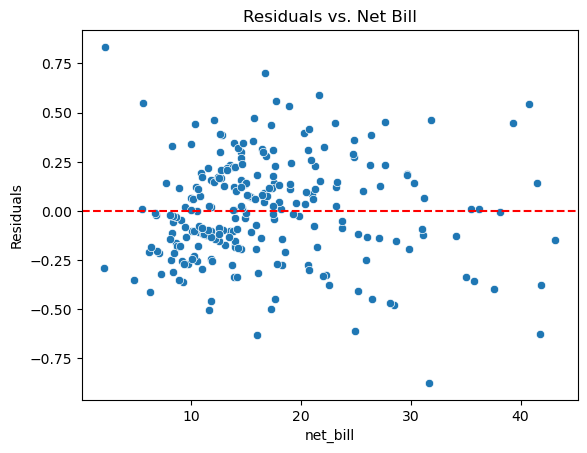

In [21]:
# Gerando gráfico de resíduos em função de net_bill

sns.scatterplot(x=tips['net_bill'], y=mod.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Net Bill')
plt.ylabel('Residuals')
plt.show()

In [22]:
# Testando a transformação de net_bill - logarítmo

tips['log_net_bill'] = np.log(tips['net_bill'] + 1)
y, X_log = dmatrices('log_tip ~ sex + smoker + log_net_bill', data=tips, return_type='dataframe')
mod_log = sm.OLS(y, X_log).fit()
print(mod_log.summary())

                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     38.49
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           2.41e-20
Time:                        18:22:58   Log-Likelihood:                -18.278
No. Observations:                 244   AIC:                             44.56
Df Residuals:                     240   BIC:                             58.54
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1783      0.115      1.557

In [23]:
# Testando a transformação de net_bill - polimônio

tips['net_bill_sq'] = tips['net_bill']**2
y, X_poly = dmatrices('log_tip ~ sex + smoker + net_bill + net_bill_sq', data=tips, return_type='dataframe')
mod_poly = sm.OLS(y, X_poly).fit()
print(mod_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     30.85
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           1.04e-20
Time:                        18:23:24   Log-Likelihood:                -15.410
No. Observations:                 244   AIC:                             40.82
Df Residuals:                     239   BIC:                             58.31
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7564      0.085      8.848

In [27]:
# Calculando o R² na escala original

tips['pred_tip'] = np.exp(mod_poly.fittedvalues) - 1
R2_original = tips[['pred_tip', 'tip']].corr().iloc[0,1]**2
print("R^2 na escala original:", R2_original)

R^2 na escala original: 0.3367247305027562


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [220]:
# Carregando o dataset
df = pd.read_csv('previsao_de_renda.csv')

In [221]:
# Verificando a quantidade de NaN em cada coluna
print(df.isna().sum())

Unnamed: 0                  0
data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64


In [222]:
# Remover coluna desnecessária
df = df.drop(columns=['Unnamed: 0'])

In [223]:
# Verificando NaNs
print(df.isna().sum())

data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64


In [224]:
# Substituir NaNs na coluna 'tempo_emprego' pela média da coluna
media_tempo_emprego = df['tempo_emprego'].mean()
df['tempo_emprego'].fillna(media_tempo_emprego, inplace=True)

In [225]:
# Converta 'data_ref' para datetime se ainda não for
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Crie colunas separadas para ano, mês e dia
df['ano'] = df['data_ref'].dt.year
df['mes'] = df['data_ref'].dt.month
df['dia'] = df['data_ref'].dt.day

# Remova a coluna 'data_ref' original
df = df.drop(columns=['data_ref'])

In [226]:
# Transformar colunas categóricas em dummies
colunas_categoricas = ['sexo', 'posse_de_veiculo', 'educacao', 'estado_civil', 'tipo_residencia', 'tipo_renda']
df = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

In [227]:
# Verificar o dataframe após as transformações
print(df.head())

   index  posse_de_imovel  qtd_filhos  idade  tempo_emprego  \
0   8682             True           1     36       3.575342   
1  12830             True           0     42       0.860274   
2   2885             True           2     31       8.065753   
3  16168            False           0     50       1.208219   
4  12438            False           0     52      13.873973   

   qt_pessoas_residencia    mau    renda   ano  mes  ...  estado_civil_Viúvo  \
0                    3.0  False  3369.24  2015    1  ...                   0   
1                    2.0  False  6096.14  2015    1  ...                   0   
2                    4.0  False  5658.98  2015    1  ...                   0   
3                    2.0  False  7246.69  2015    1  ...                   0   
4                    2.0  False  4017.37  2015    1  ...                   0   

   tipo_residencia_Casa  tipo_residencia_Com os pais  \
0                     1                            0   
1                     1     

In [228]:
# Divisão dos dados em treino e teste

from sklearn.model_selection import train_test_split

# Definindo as variáveis independentes e dependentes
X = df['tempo_emprego'].values.reshape(-1,1)
y = df['renda'].values

# Dividindo os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [229]:
# Criação do modelo

from sklearn.linear_model import LinearRegression

# Criando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

LinearRegression()

In [231]:
# Avaliando o modelo

from sklearn.metrics import mean_squared_error, r2_score

# Fazendo previsões com os dados de teste
y_pred = model.predict(X_test)

# Calculando o erro quadrático médio (MSE) e o coeficiente de determinação (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R^2): {r2}")

Erro Quadrático Médio (MSE): 18937823.224507593
Coeficiente de Determinação (R^2): 0.1466199198000856


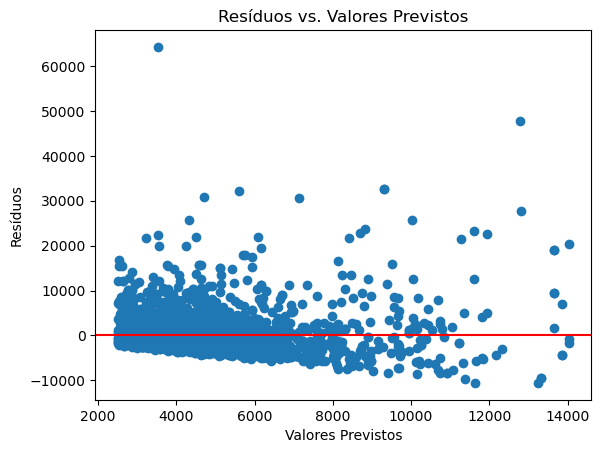

In [232]:
# Calculando os resíduos
residuos = y_test - y_pred

# Plotando os resíduos
plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Previstos')
plt.show()

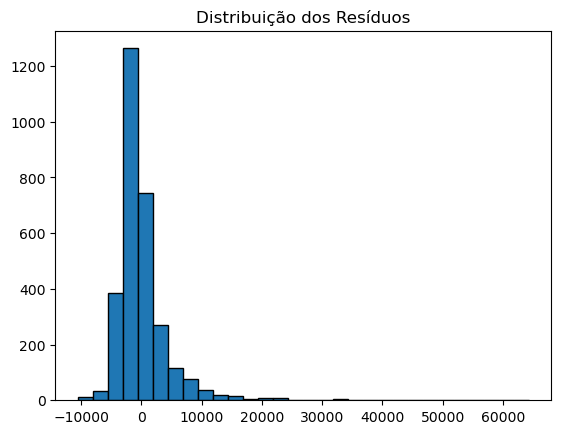

In [233]:
# Histograma ou QQ-Plot dos resíduos

plt.hist(residuos, bins=30, edgecolor='k')
plt.title('Distribuição dos Resíduos')
plt.show()

In [234]:
# Separando a variável resposta e as variáveis explicativas
X = df.drop('renda', axis=1) # Todas as colunas exceto renda
y = df['renda']

In [235]:
# Dividindo os dados em treinamento e teste
from sklearn.model_selection import train_test_split

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [237]:
# Adicionando a constante ao modelo (intercepto)
X_train_const = sm.add_constant(X_train)

In [243]:
# Convertendo colunas booleanas para int
X_train_const['posse_de_imovel'] = X_train_const['posse_de_imovel'].astype(int)
X_train_const['mau'] = X_train_const['mau'].astype(int)

In [244]:
# Ajustando o modelo de regressão linear múltipla
model = sm.OLS(y_train, X_train_const).fit()

In [245]:
# Exibindo as estatísticas de saída
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     99.23
Date:                Wed, 06 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:34:41   Log-Likelihood:            -1.0219e+05
No. Observations:               10500   AIC:                         2.044e+05
Df Residuals:                   10471   BIC:                         2.046e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
index         

In [247]:
# Primeiro, defina o seu target e suas features
target = df['renda']
features = df.drop('renda', axis=1)  # Suponho que "renda" é sua variável dependente

In [248]:
# Adicione uma constante ao modelo (o intercepto)
features = sm.add_constant(features)

In [264]:
features['posse_de_imovel'] = features['posse_de_imovel'].astype(int)
features['mau'] = features['mau'].astype(int)

In [263]:
# Ajuste o modelo inicial
model = sm.OLS(target, features).fit()

In [262]:
# Pegue as variáveis com p-valor > 0.05 (não significativas)
insignificant_vars = model.pvalues[model.pvalues > 0.05].index

In [261]:
# Remova as variáveis não significativas
features_significant = features.drop(insignificant_vars, axis=1)

In [259]:
# Reajuste o modelo
model_refitted = sm.OLS(target, features_significant).fit()

In [260]:
# Exiba o novo resumo
print(model_refitted.summary())

                                 OLS Regression Results                                
Dep. Variable:                  renda   R-squared (uncentered):                   0.609
Model:                            OLS   Adj. R-squared (uncentered):              0.609
Method:                 Least Squares   F-statistic:                              1948.
Date:                Wed, 06 Sep 2023   Prob (F-statistic):                        0.00
Time:                        19:41:13   Log-Likelihood:                     -1.4603e+05
No. Observations:               15000   AIC:                                  2.921e+05
Df Residuals:                   14988   BIC:                                  2.922e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

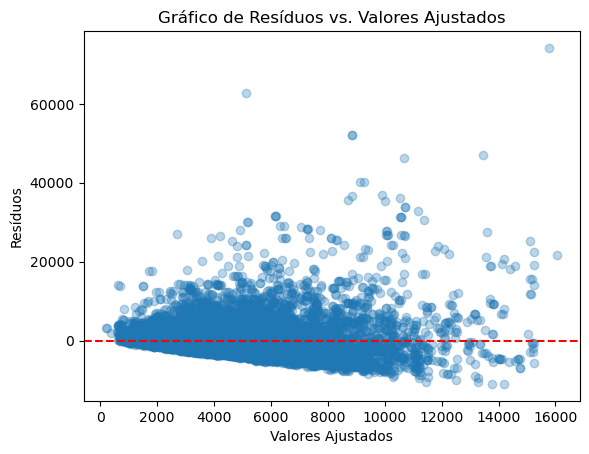

In [258]:
# Usando o seu modelo já ajustado
residuals = model.resid
fitted = model.fittedvalues

plt.scatter(fitted, residuals, alpha=0.3)
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Resíduos vs. Valores Ajustados')
plt.show()